In [63]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
from sklearn.preprocessing import MinMaxScaler
import pandas.tseries.offsets as offsets

from tqdm import tqdm

In [64]:
# 誤字脱字なし
symbols_names = {
    '6501.JP': 'Hitachi',
    '6502.JP': 'Toshiba',
    '4776.JP': 'Cybozu',
    '6027.JP': 'Bengo4.com',
    '4385.JP': 'Mercari',
}

In [65]:
for i, key in enumerate(symbols_names):
    print(i, ' : ', key)

0  :  6501.JP
1  :  6502.JP
2  :  4776.JP
3  :  6027.JP
4  :  4385.JP


In [66]:
for i, key in enumerate(symbols_names):
    print(i, ' : ', symbols_names.get(key))

0  :  Hitachi
1  :  Toshiba
2  :  Cybozu
3  :  Bengo4.com
4  :  Mercari


In [67]:
stock_data = {}

error_symbols = {}

for j, key in enumerate(tqdm(symbols_names)): # tqdmあり
#for j, key in enumerate(symbols_names): # tqdmなし
    try:
        stock_data[j] = data.DataReader(key, 'stooq').sort_values('Date', ascending=True)
        stock_data[j] = stock_data[j].drop(['Open', 'High', 'Low', 'Volume'], axis=1)
    except:
        error_symbols.append(key)

100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


In [68]:
stock_data

{0:              Close
 Date              
 2016-06-21  2316.5
 2016-06-22  2287.6
 2016-06-23  2371.4
 2016-06-24  2127.4
 2016-06-27  2053.9
 ...            ...
 2021-06-11  5983.0
 2021-06-14  6032.0
 2021-06-15  6100.0
 2021-06-16  6251.0
 2021-06-17  6181.0
 
 [1218 rows x 1 columns],
 1:               Close
 Date               
 2016-06-21  2901.77
 2016-06-22  2817.86
 2016-06-23  2836.40
 2016-06-24  2581.74
 2016-06-27  2590.51
 ...             ...
 2021-06-11  4645.00
 2021-06-14  4770.00
 2021-06-15  4700.00
 2021-06-16  4760.00
 2021-06-17  4820.00
 
 [1218 rows x 1 columns],
 2:               Close
 Date               
 2016-06-21   369.83
 2016-06-22   370.77
 2016-06-23   378.27
 2016-06-24   342.61
 2016-06-27   360.45
 ...             ...
 2021-06-11  2518.00
 2021-06-14  2558.00
 2021-06-15  2612.00
 2021-06-16  2558.00
 2021-06-17  2464.00
 
 [1218 rows x 1 columns],
 3:               Close
 Date               
 2016-06-21   767.00
 2016-06-22   765.33
 2016-06-23   

In [69]:
len(stock_data)

5

In [70]:
error_symbols

{}

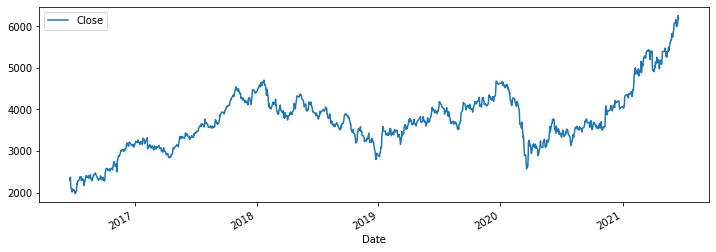

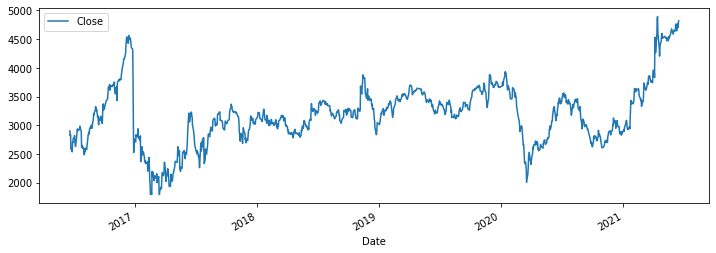

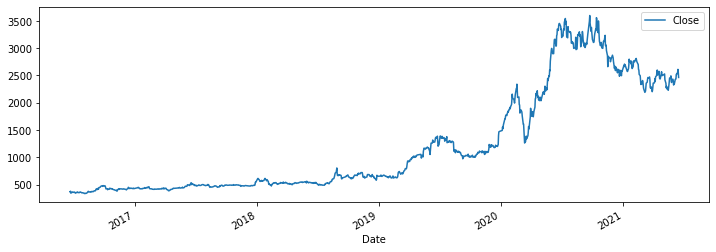

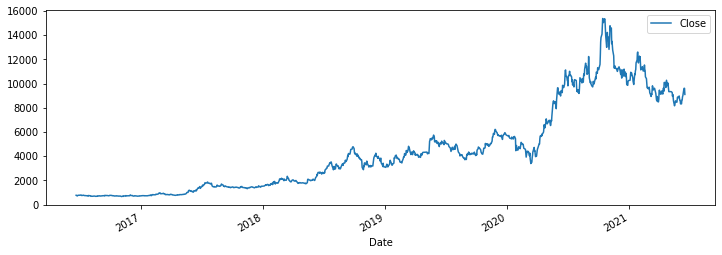

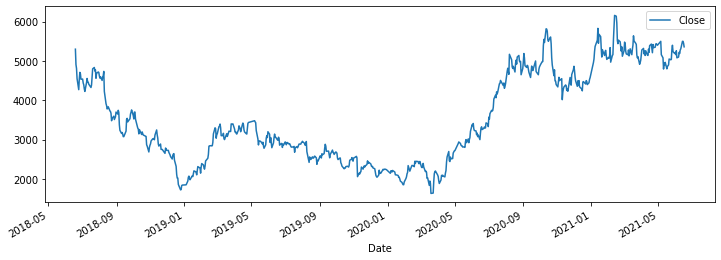

In [71]:
for j, key in enumerate(symbols_names):
    stock_data[j].plot(figsize=(12, 4))

In [72]:
y = {}
scaler = {}

for j, key in enumerate(symbols_names):
    y[j] = stock_data[j]['Close'].values

    scaler[j] = MinMaxScaler(feature_range=(-1, 1))
    scaler[j].fit(y[j].reshape(-1, 1))
    y[j] = scaler[j].transform(y[j].reshape(-1, 1))

    y[j] = torch.FloatTensor(y[j]).view(-1)

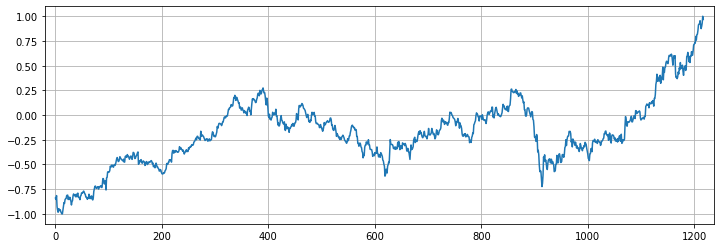

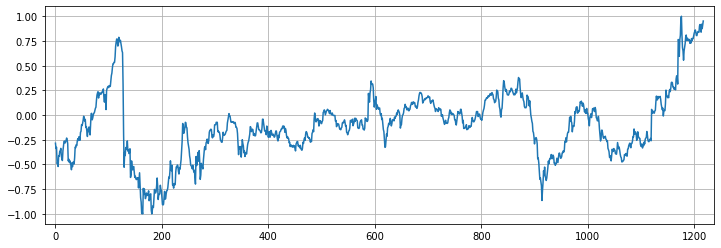

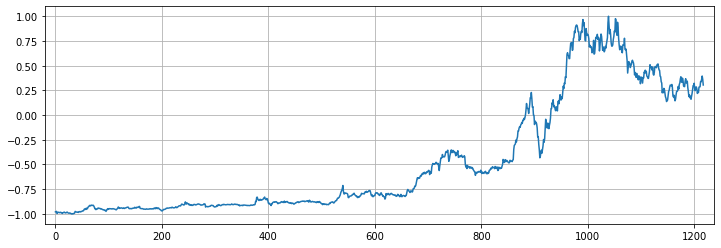

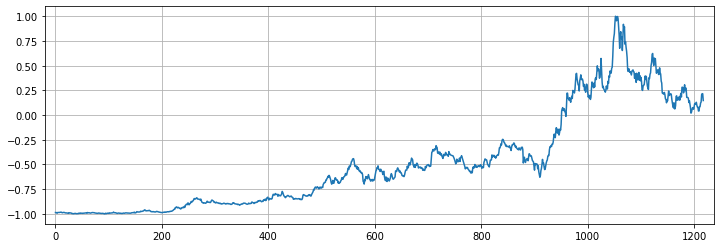

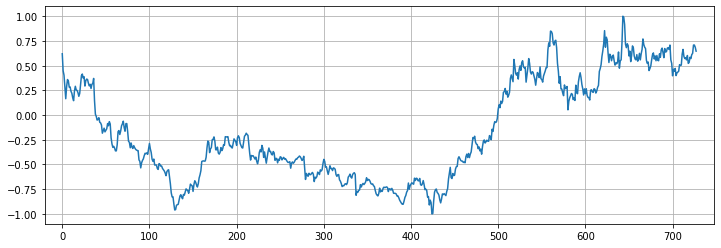

In [73]:
for j, key in enumerate(symbols_names):
    plt.figure(figsize=(12, 4))
    plt.xlim(-20, len(y[j])+20)
    plt.grid(True)
    plt.plot(y[j])

In [74]:
train_window_size = 7

In [75]:
def input_data(seq, ws):
    out = []
    L = len(seq)

    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))

    return out

In [76]:
class Model(nn.Module):

    def __init__(self, input=1, h=50, output=1):
        super().__init__()
        self.hidden_size = h

        self.lstm = nn.LSTM(input, h)
        self.fc = nn.Linear(h, output)

        self.hidden = (
            torch.zeros(1, 1, h),
            torch.zeros(1, 1, h)
        )

    def forword(self, seq):

        out, _ = self.lstm(
            seq.view(len(seq), 1, -1),
            self.hidden
        )

        out = self.fc(
            out.view(len(seq), -1)
        )

        return out[-1]

In [77]:
test_size = 30
epochs = 20
extending_seq = {}


Hitachi
Epoch: 1

Hitachi
Epoch: 2

Hitachi
Epoch: 3

Hitachi
Epoch: 4

Hitachi
Epoch: 5

Hitachi
Epoch: 6

Hitachi
Epoch: 7

Hitachi
Epoch: 8

Hitachi
Epoch: 9

Hitachi
Epoch: 10

Hitachi
Epoch: 11

Hitachi
Epoch: 12

Hitachi
Epoch: 13

Hitachi
Epoch: 14

Hitachi
Epoch: 15

Hitachi
Epoch: 16

Hitachi
Epoch: 17

Hitachi
Epoch: 18

Hitachi
Epoch: 19

Hitachi
Epoch: 20


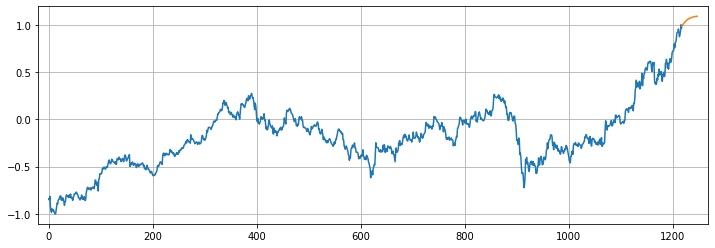


Toshiba
Epoch: 1

Toshiba
Epoch: 2

Toshiba
Epoch: 3

Toshiba
Epoch: 4

Toshiba
Epoch: 5

Toshiba
Epoch: 6

Toshiba
Epoch: 7

Toshiba
Epoch: 8

Toshiba
Epoch: 9

Toshiba
Epoch: 10

Toshiba
Epoch: 11

Toshiba
Epoch: 12

Toshiba
Epoch: 13

Toshiba
Epoch: 14

Toshiba
Epoch: 15

Toshiba
Epoch: 16

Toshiba
Epoch: 17

Toshiba
Epoch: 18

Toshiba
Epoch: 19

Toshiba
Epoch: 20


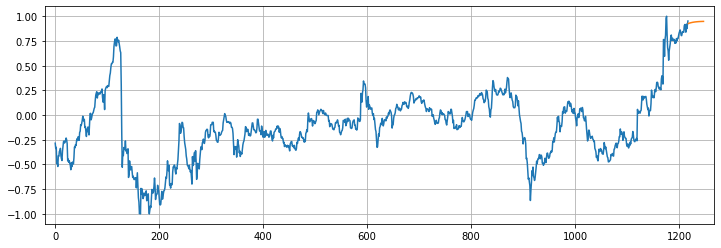


Cybozu
Epoch: 1

Cybozu
Epoch: 2

Cybozu
Epoch: 3

Cybozu
Epoch: 4

Cybozu
Epoch: 5

Cybozu
Epoch: 6

Cybozu
Epoch: 7

Cybozu
Epoch: 8

Cybozu
Epoch: 9

Cybozu
Epoch: 10

Cybozu
Epoch: 11

Cybozu
Epoch: 12

Cybozu
Epoch: 13

Cybozu
Epoch: 14

Cybozu
Epoch: 15

Cybozu
Epoch: 16

Cybozu
Epoch: 17

Cybozu
Epoch: 18

Cybozu
Epoch: 19

Cybozu
Epoch: 20


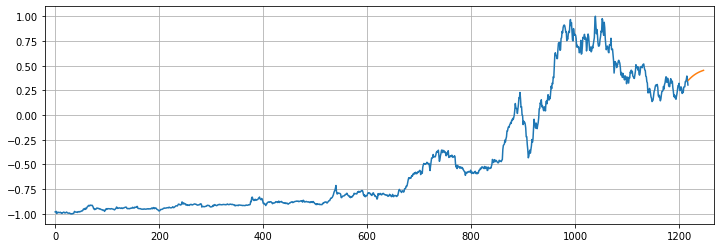


Bengo4.com
Epoch: 1

Bengo4.com
Epoch: 2

Bengo4.com
Epoch: 3

Bengo4.com
Epoch: 4

Bengo4.com
Epoch: 5

Bengo4.com
Epoch: 6

Bengo4.com
Epoch: 7

Bengo4.com
Epoch: 8

Bengo4.com
Epoch: 9

Bengo4.com
Epoch: 10

Bengo4.com
Epoch: 11

Bengo4.com
Epoch: 12

Bengo4.com
Epoch: 13

Bengo4.com
Epoch: 14

Bengo4.com
Epoch: 15

Bengo4.com
Epoch: 16

Bengo4.com
Epoch: 17

Bengo4.com
Epoch: 18

Bengo4.com
Epoch: 19

Bengo4.com
Epoch: 20


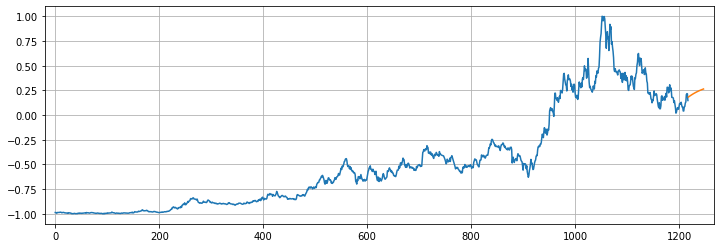


Mercari
Epoch: 1

Mercari
Epoch: 2

Mercari
Epoch: 3

Mercari
Epoch: 4

Mercari
Epoch: 5

Mercari
Epoch: 6

Mercari
Epoch: 7

Mercari
Epoch: 8

Mercari
Epoch: 9

Mercari
Epoch: 10

Mercari
Epoch: 11

Mercari
Epoch: 12

Mercari
Epoch: 13

Mercari
Epoch: 14

Mercari
Epoch: 15

Mercari
Epoch: 16

Mercari
Epoch: 17

Mercari
Epoch: 18

Mercari
Epoch: 19

Mercari
Epoch: 20


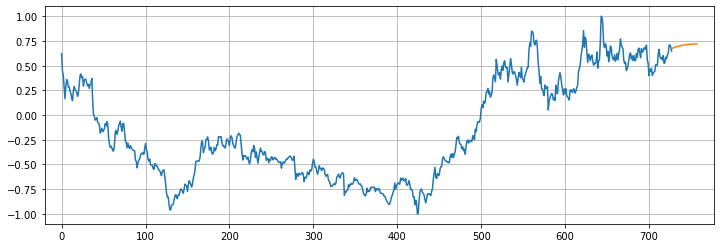

In [78]:
for j, key in enumerate(symbols_names):

    train_data = input_data(y[j], train_window_size)

    torch.manual_seed(123)
    model = Model()
    criterion = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


    for epoch in range(epochs):
        print()
        print(symbols_names.get(key))
        print(f'Epoch: {epoch+1}')


        for train_window, correct_label in train_data:

            optimizer.zero_grad()

            model.hidden = (
                torch.zeros(1, 1, model.hidden_size),
                torch.zeros(1, 1, model.hidden_size)
            )
            train_predicted_label = model.forword(train_window)
            train_loss = criterion(train_predicted_label, correct_label)

            train_loss.backward()
            optimizer.step()


        extending_seq[j] = y[j][-test_size:].tolist()


        for i in range(test_size):

            test_window = torch.FloatTensor(extending_seq[j][-test_size:])

            with torch.no_grad():

                model.hidden = (
                    torch.zeros(1, 1, model.hidden_size),
                    torch.zeros(1, 1, model.hidden_size)
                )

                test_predicted_label = model.forword(test_window)
                extending_seq[j].append(test_predicted_label.item())


    plt.figure(figsize=(12, 4))
    plt.xlim(-20, len(y[j])+50)
    plt.grid(True)
    plt.plot(y[j])
    plt.plot(
        range(len(y[j]), len(y[j])+test_size),
        extending_seq[j][-test_size:]
    )
    plt.show()

In [79]:
# 未来のデータの数値を、株価のスケールに変換する。

predicted_nomalized_labels_list = {}
predicted_nomalized_labels_array_1d = {}
predicted_nomalized_labels_array_2d = {}
predicted_labels_array_2d = {}

for j, key in enumerate(symbols_names):
    predicted_nomalized_labels_list[j] = extending_seq[j][-test_size:]
    predicted_nomalized_labels_array_1d[j] = np.array(predicted_nomalized_labels_list[j])
    predicted_nomalized_labels_array_2d[j] = predicted_nomalized_labels_array_1d[j].reshape(-1, 1)
    predicted_labels_array_2d[j] = scaler[j].inverse_transform(predicted_nomalized_labels_array_2d[j])

In [80]:
predicted_labels_array_2d

{0: array([[6218.28240728],
        [6238.79965377],
        [6257.75200176],
        [6275.21310854],
        [6291.2805891 ],
        [6306.0467062 ],
        [6319.6001544 ],
        [6332.02504063],
        [6343.40343285],
        [6353.81281137],
        [6363.32683349],
        [6372.01456881],
        [6379.94202852],
        [6387.17063618],
        [6393.75748253],
        [6399.75558043],
        [6405.21539402],
        [6410.18178034],
        [6414.69806719],
        [6418.8032496 ],
        [6422.53326416],
        [6425.92098904],
        [6428.99726343],
        [6431.78961325],
        [6434.32352543],
        [6436.62295771],
        [6438.70880938],
        [6440.60070539],
        [6442.31623173],
        [6443.87144518]]),
 1: array([[4781.68296816],
        [4784.47352686],
        [4787.09963036],
        [4789.54074488],
        [4791.80778477],
        [4793.90777962],
        [4795.84683406],
        [4797.63271763],
        [4799.27393982],
        [4800.780

In [84]:
real_last_date_timestamp = {}

future_first_date_timestamp = {}
future_first_date_series_object = {}
future_first_date_str = {}

future_last_date_timestamp = {}
future_last_date_series_object = {}
future_last_date_str = {}

furture_period = {}

plot_start_date_timestamp = {}

for j, key in enumerate(symbols_names):
    # 直近のデータの最後の日付 （Timestamp型）
    real_last_date_timestamp[j] = stock_data[j].index[-1]

    # 未来の最初の日付　（Timestamp型）
    future_first_date_timestamp[j] = real_last_date_timestamp[j] + offsets.Day()
    # 未来の最初の日付　（Series object型）
    future_first_date_series_object[j] = pd.Series(future_first_date_timestamp[j]).astype(str)
    # 未来の最初の日付（str型）
    future_first_date_str[j] = future_first_date_series_object[j][0]

    # 未来の最後の日付　（Timestamp型）
    future_last_date_timestamp[j] = future_first_date_timestamp[j] + offsets.Day(30)
    # 未来の最後の日付　（Series object型）
    future_last_date_series_object[j] = pd.Series(future_last_date_timestamp[j]).astype(str)
    # 未来の最後の日付（str型）
    future_last_date_str[j] = future_last_date_series_object[j][0]

    # 直近の全てのデータを学習用に使う場合（test_size = 30）
    furture_period[j] = np.arange(future_first_date_str[j], future_last_date_str[j], dtype='datetime64')

    # 直近のデータの最後の日付から３ヶ月ほど、遡った日付(Timestamp型)
    plot_start_date_timestamp[j] = real_last_date_timestamp[j] + offsets.Day(-90)

In [82]:
furture_period

{0: array(['2021-06-18', '2021-06-19', '2021-06-20', '2021-06-21',
        '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
        '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29',
        '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03',
        '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
        '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
        '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
        '2021-07-16'], dtype='datetime64[D]'),
 1: array(['2021-06-18', '2021-06-19', '2021-06-20', '2021-06-21',
        '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
        '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29',
        '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03',
        '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
        '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
        '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
        '2021-07-16'], dtype='datetime64[D]'),
 2: 

  0%|          | 0/5 [00:00<?, ?it/s]

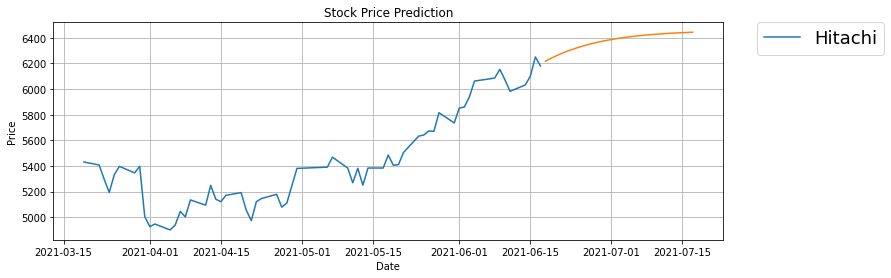

 20%|██        | 1/5 [00:02<00:11,  2.97s/it]

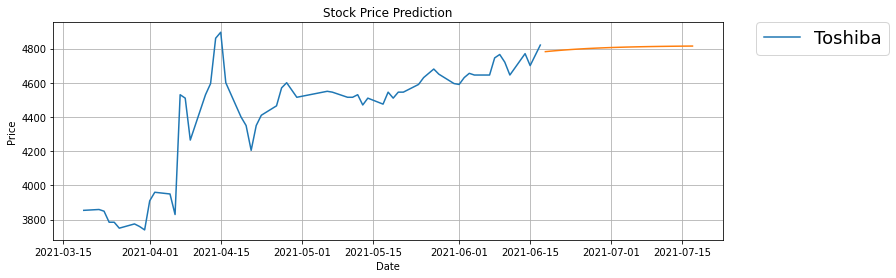

 40%|████      | 2/5 [00:03<00:04,  1.60s/it]

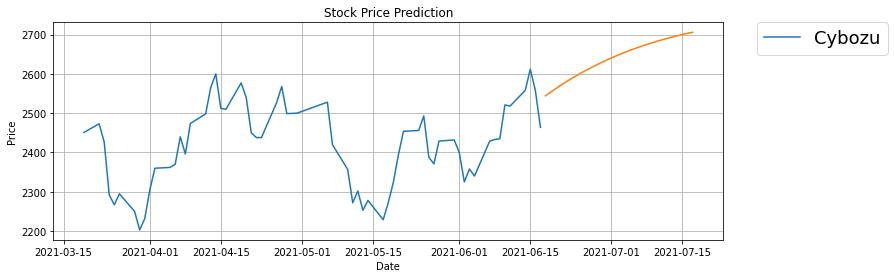

 60%|██████    | 3/5 [00:04<00:02,  1.14s/it]

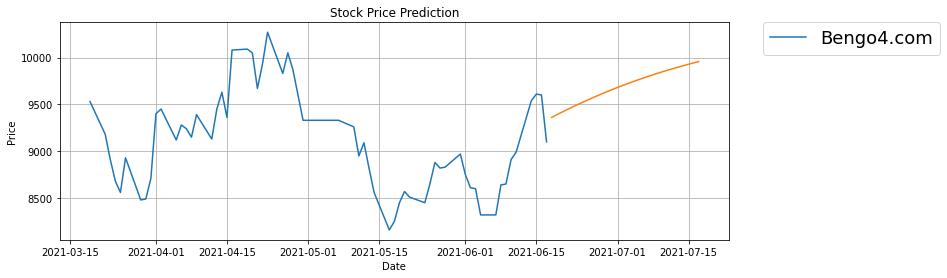

 80%|████████  | 4/5 [00:06<00:01,  1.40s/it]

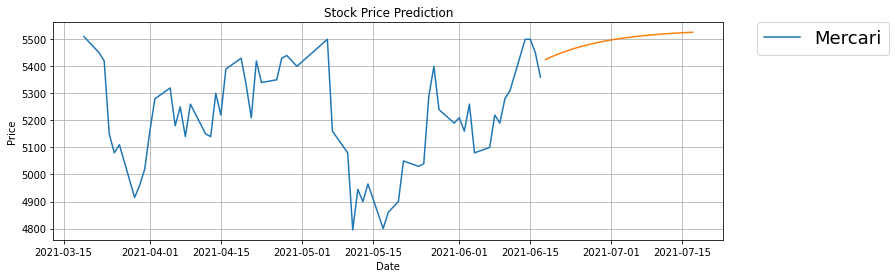

100%|██████████| 5/5 [00:07<00:00,  1.59s/it]


In [86]:
for j, key in enumerate(tqdm(symbols_names)):
    fig = plt.figure(figsize=(12, 4))
    plt.title('Stock Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)

    plt.plot(stock_data[j]["Close"][plot_start_date_timestamp[j]:], label=symbols_names.get(key))

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, fontsize=18)

    plt.plot(furture_period[j], predicted_labels_array_2d[j])

    plt.show()